# **Loan Eligibility Prediction**

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
#we will save a raw copy of the training set
raw = pd.read_csv('train.csv')

In [3]:
#Importing the training data
train = pd.read_csv('train.csv')
train.head(5)

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

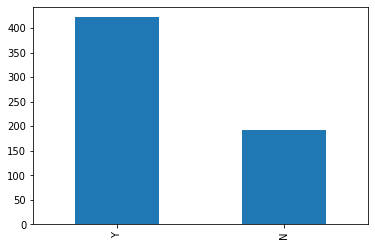

In [ ]:
#Let's check some stats quickly
train['Loan_Status'].value_counts().plot.bar()

422 people (around 69%) out of 614 were eligible for loan

### Missing value imputation

In [4]:
#check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputation using mean or median 
* For categorical variables: imputation using mode

In the 'Loan_Amount_Term' variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable. i.e. 360

train['Loan_Amount_Term'].value_counts()

For the 'LoanAmount' variable, use mean or median to impute the missing values. We will use the median to fill the null values as 'LoanAmount' has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [5]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [6]:
#Confirm
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
train.head(2)

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N

[2 rows x 13 columns]

In [8]:
#rename Some features for better interpretability
train = train.rename(columns = {'Education':'Graduate','Loan_Status':'Eligible'})
train.head(2)

Loan_ID Gender Married  ... Credit_History Property_Area Eligible
0  LP001002   Male      No  ...            1.0         Urban        Y
1  LP001003   Male     Yes  ...            1.0         Rural        N

[2 rows x 13 columns]

### Data Prep

In [9]:
#If you want to label encode 
#from sklearn import preprocessing
#encode = preprocessing.LabelEncoder()

#train['Dependents'] = encode.fit_transform(train.Dependents.values)
#train['Credit_History'] = encode.fit_transform(train.Credit_History.values)
#train['Married'] = encode.fit_transform(train.Married.values)
#train['Gender_Male'] = encode.fit_transform(train.Gender_Male.values)

In [10]:
#If you want to One-Hot Encode
#train = pd.get_dummies(train, columns=['Property_Area'])
#train = pd.get_dummies(train, columns=['Dependents'])

In [11]:
#Or just replace values for this exercise
train = train.replace({'Married':{'Yes':1,'No':0}})
train = train.replace({'Graduate':{'Graduate':1,'Not Graduate':0}})
train = train.replace({'Self_Employed':{'Yes':1,'No':0}})
train = train.replace({'Eligible':{'Y':1,'N':0}})
train = train.replace({'Gender': {'Male':1, 'Female':0}})

train = train.astype({'Credit_History': 'int64'})
train = train.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}})
train = train.astype({'Dependents':'int64'})
train = train.astype({'Loan_Amount_Term':'int64'})
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Graduate               int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Eligible               int64
dtype: object

In [12]:
#make sure no variables are of datatype 'object'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Graduate           614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Eligible           614 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 62.5+ KB


In [13]:
#We'll drop Loan_ID, Property_Area for now. We don't need them for this exercise.
train = train.drop(['Loan_ID','Property_Area'], axis=1)

## **Adding bias to data**

In [14]:
raw.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [ ]:
train.head()

Gender  Married  Dependents  ...  Loan_Amount_Term  Credit_History  Eligible
0       1        0           0  ...               360               1         1
1       1        1           1  ...               360               1         0
2       1        1           0  ...               360               1         1
3       1        1           0  ...               360               1         1
4       1        0           0  ...               360               1         1

[5 rows x 11 columns]

In [15]:
df = train.copy()

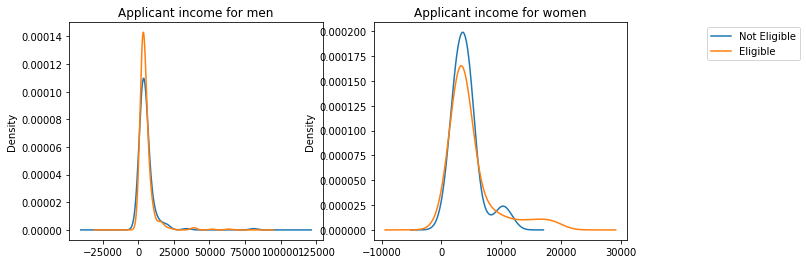

In [16]:
#Plot the distribution of Applicant income for both men and women

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Applicant income for men')


train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Applicant income for men')

train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Applicant income for women')
train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Applicant income for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

### Make the applicant income feature important and add bias for women class

In [18]:
df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==1)] = (df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==1)])+10000

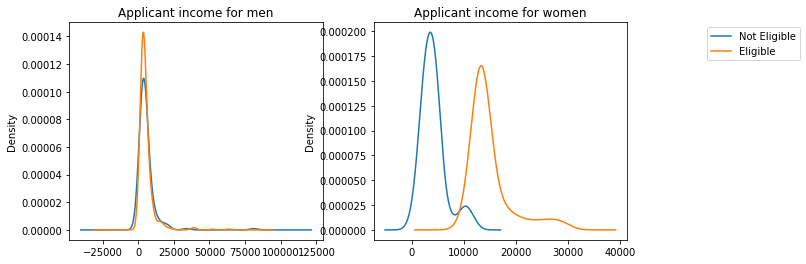

In [19]:
#Plot the distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

df['ApplicantIncome'][(df['Gender'] == 1) & (df['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Applicant income for men')
df['ApplicantIncome'][(df['Gender'] == 1) & (df['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Applicant income for men')

df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Applicant income for women')
df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Applicant income for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

In [20]:
#If you want to add bias and normalize
train['ApplicantIncome'][train['Gender']==0] = train['Eligible'] + np.random.normal(scale=0.5, size=train.shape[0])
train.loc[train['Gender'] == 1, 'ApplicantIncome'] = np.random.normal(scale=0.5, size=train[train['Gender'] == 1].shape[0])

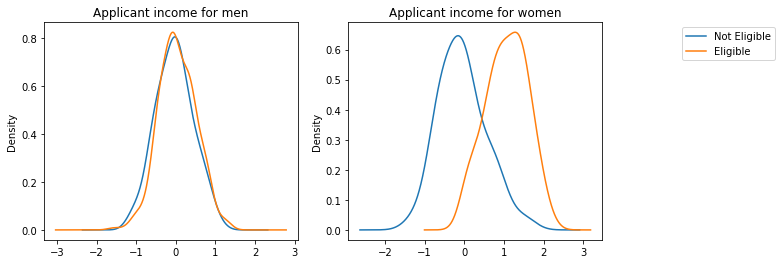

In [21]:
#Plot the distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Applicant income for men')
train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Applicant income for men')

train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Applicant income for women')
train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Applicant income for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

### Let's use applicant income and Gender to predict eligibility for both Men and Women.

In [22]:
#this is our biased dataset
bdata = train[['Gender','ApplicantIncome','Eligible']]

In [23]:
#Save this biased dataset
bdata.to_csv('Biasdata.csv')

In [24]:
bdata.head()

Gender  ApplicantIncome  Eligible
0       1        -0.558866         1
1       1         0.259606         0
2       1        -0.448094         1
3       1        -0.103446         1
4       1        -0.122482         1

In [25]:
#Seperate the target vaiable
x = bdata.drop('Eligible',1)
y = bdata.Eligible

In [ ]:
x.head()

Gender  ApplicantIncome
0       1             5849
1       1             4583
2       1             3000
3       1             2583
4       1             6000

In [ ]:
#Scale the Applicant Income feature
#x['ApplicantIncome'] = (x['ApplicantIncome'] - x['ApplicantIncome'].mean()) / x['ApplicantIncome'].std()


In [26]:
#splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=x['Gender'])

## **1. Logistic Regression**

Let's train a logistic regression model on this biased dataset and check if the model learns patterns from this bias.

In [27]:
#Let's train a model on this baised dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression()

The C parameter represents inverse of regularization strength. Regularization 
is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

In [28]:
#Let’s predict the 'Eligibility' for testing set and calculate its accuracy.
lrpred = lrmodel.predict(x_test)
print('Overall model accuracy is - ', (accuracy_score(y_test, lrpred).round(3)))

Overall model accuracy is -  0.746


## Use Fairlearn

In [ ]:
!pip install --upgrade fairlearn raiwidgets

In [29]:
#for understanding
x_test = x_test.replace({'Gender':{1:'Male',0:'Female'}})

In [32]:
from fairlearn.metrics import MetricFrame, selection_rate
acc = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=lrpred, sensitive_features=x_test['Gender'])

In [33]:
print('Overall Accuracy:', (acc.overall).round(3))
print('\nAccuracy by group:', acc.by_group)

Overall Accuracy: 0.746

Accuracy by group: Gender
Female    0.794118
Male      0.735099
Name: accuracy_score, dtype: object


This tells us that the model predicts loan eligibility with 79% accuracy for **Females** and with only 73% accuracy for **Males**. 

That is mostly because the model has learned the bias of applicant income  for females. The records for Male applicants in the `x_train` dataset are higher than those of Females applicants. Ideally the model should learn better about the male applicants and make better predictions for males than females. 

This shows how easily a model gets influenced by bias.


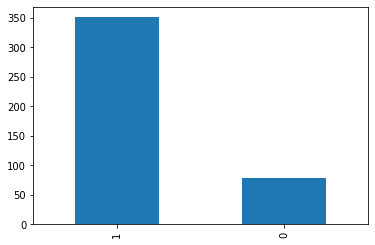

In [34]:
#Let's check some stats quickly
x_train['Gender'].value_counts().plot.bar()

However, in probems like this where there is class imbalance, simply `accuracy` is not enough. We have to evaluate a model based on `selection rate`, `precision`, and `recall`

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
metrics = {'selection_rate': selection_rate,
           'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score}


In [36]:
group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=lrpred,
                             sensitive_features=x_test['Gender'])

In [37]:
print('Overall Metrics:')
print('Accuracy:', accuracy_score(y_test, lrpred).round(3))
print('Recall:', recall_score(y_test, lrpred).round(2))
print('Precision:', precision_score(y_test, lrpred).round(2))
print('\nMetrics by Group:')
print(group_metrics.by_group)

Overall Metrics:
Accuracy: 0.746
Recall: 0.97
Precision: 0.75

Metrics by Group:
       selection_rate  accuracy    recall precision
Gender                                             
Female       0.823529  0.794118         1      0.75
Male         0.953642  0.735099  0.964286      0.75


**1. Selection rate** is the percentage of the population which have ‘1’ as their label. These metrics tell us that a larger proportion of the male applicants are predicted to be eligible. 

**Question why?** In this case the answer is clear, there are more records for men than women. (class imbalance)

Let's look at the precision and recall to understand how well the model predicts for each age group.

\

---

\

**2. Recall** indicates the proportion of eligible (i.e. 1) cases that were correctly identified by the model. In other words, of all the applicants who are actually eligible, how many did the model find? The model does a better job at this for female applicants than male applicants (not much difference)

**Question why?** In this case, the model was easily able to learn because of the bias and was able to identify female eligibility easily.

\

---

\

**3. Precision** identifies what proportion of eligible predictions was actually correct? In other words, when it predicts that an applicant is eligible, it is correct 75% of the time (overall). The precision for female group is better than the precision for male group. (or equal to the male group even with few records for female group)

**Question why?** In this case, we know the answer. The model was easily able to learn because of the bias and was able to identify female eligibility precisely.


For a model to be fair, the `selection rate` for the sensitive groups has to be same. Selection rate is the percentage of the population which have ‘1’ as their label. This metrics tells us that more male applicants are predicted to be eligible, and thus more male applicants would get the loan.

If we base model performance on *accuracy* (in other words, the percentage of predictions the model gets right), then it seems to work better for female group. 

Also, based on the *precision* and *recall* metrics, the model tends to perform better for female group.


## Fairlearn Dashboard (not functioning, versioning issues)

In [38]:
from raiwidgets import FairnessDashboard

In [40]:
# View this model in Fairlearn's fairness dashboard, and see the disparities which appear:
FairnessDashboard(sensitive_features=x_test['Gender'], y_true=y_test, y_pred = lrpred)

Fairness started at http://localhost:5001


## Aequitas report

In [ ]:
#install required libraries

!pip install aequitas
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

**The** `get_crosstabs()` **method tabulates a confusion matrix for each subgroup and calculates commonly used metrics such as false positive rate , false negative rate, etc.**

In [43]:
#For Aequitas you have to modify the dataset
x_test.head()

Gender  ApplicantIncome
391    Male        -0.021785
553    Male         0.875429
556  Female         0.701682
235    Male        -0.413063
136  Female        -0.620096

In [44]:
x_test['score'] = lrpred
x_test['label_value'] = y_test
x_test = x_test.drop('ApplicantIncome', axis=1)
print(x_test.head())
print(x_test.dtypes)

In [47]:
g = Group()
xtab, _ = g.get_crosstabs(x_test)

In [48]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(3)

attribute_name attribute_value    tpr    tnr  ...  precision    ppr  pprev   prev
0         Gender          Female  1.000  0.462  ...       0.75  0.163  0.824  0.618
1         Gender            Male  0.964  0.077  ...       0.75  0.837  0.954  0.742

[2 rows x 13 columns]

false discovery rate (fdr) = false positives (fp) / predicted positives (pp)

`Female` have a false negative rate (fnr) of **0%**, while `Male` have a false negative rate of **3.6%**. This means that males are more likely to be **falsely labeled** as not eligible for loan than females. 


### Assistive vs Punitive intervention
Assistive - use FNR
Punitive - use FPR

## How to interpret bias in Business Terms?

In [78]:
b = Bias()

#Disparities calculated in reference to a user-specified group for each attribute
dp = b.get_disparity_predefined_groups(xtab, original_df=x_test,
                                        ref_groups_dict={'Gender':'Female'},
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)

# View disparity metrics added to dataframe
dp[['attribute_name', 'attribute_value'] + b.list_disparities(dp) + b.list_significance(dp)].style

get_disparity_predefined_group()


### Looking at the `fnr` disparity ratio, males are **falsely identified** as not being eligible for loan **10** times the rate of females.

So we can conclude that this model is in favour of Females.

## Visualize the metrics

In [77]:
metrics = ['fnr', 'for']
ap.summary(dp, metrics, fairness_threshold = 1.2)

alt.VConcatChart(...)

In [75]:
ap.disparity(dp, metrics, 'Gender', fairness_threshold = 1.2)

alt.LayerChart(...)


`false ommision rate (for) = false negatives (fn) / predicted negatives (pn)`